In [1]:
import xarray as xr
import xesmf
import os
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.pyplot as plt
import seaborn as sns
# General plotting settings
sns.set_style('whitegrid')
sns.set_context("talk", font_scale=1.5, rc={"lines.linewidth": 2.5})

# Data at https://atmos.washington.edu/~nicway/data/ (2.8 and 4.2 MB)
data_dir =  r'/home/disk/sipn/nicway/public_html/data'# Where you download the files
os.chdir(data_dir)

ds_in = xr.open_dataset('ds_in_small.nc')
ds_in

ds_target = xr.open_dataset('ds_target.nc')
ds_target

# remove "top" row 
ds_in_trim = ds_in.isel(nj=slice(0,199), nj_b=slice(0,200))

# Not sure why this step is needed
ds_targettrim = ds_target.isel(ni=slice(1,359), nj=slice(1,199), ni_b=slice(1,360), nj_b=slice(1,200))

regridder = xesmf.Regridder(ds_in_trim, ds_targettrim, 'bilinear')
sic_bilinear = regridder(ds_in_trim.sic)

regridder = xesmf.Regridder(ds_in_trim, ds_targettrim, 'conservative')
sic_conservative = regridder(ds_in_trim.sic)

regridder = xesmf.Regridder(ds_in_trim, ds_targettrim, 'nearest_s2d')
sic_nearest_s2d = regridder(ds_in_trim.sic)

Overwrite existing file: bilinear_199x360_198x358.nc 
 You can set reuse_weights=True to save computing time.
Overwrite existing file: conservative_199x360_198x358.nc 
 You can set reuse_weights=True to save computing time.
Overwrite existing file: nearest_s2d_199x360_198x358.nc 
 You can set reuse_weights=True to save computing time.


Text(0,0.5,'lat')

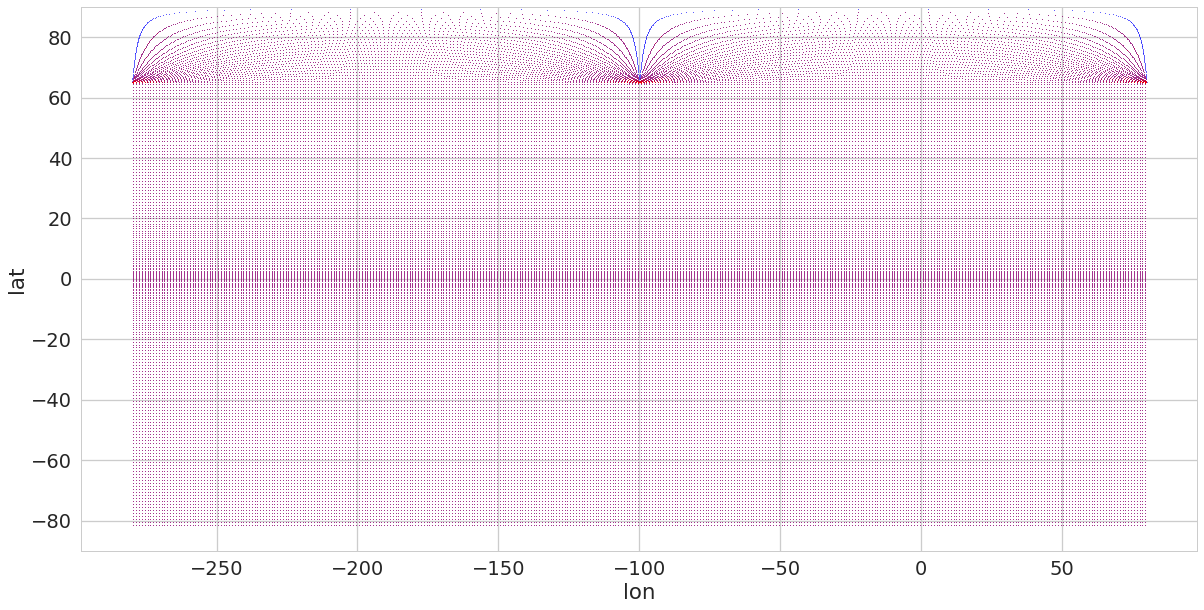

In [2]:
# Plot the input Grid
plt.figure(figsize=(20,10))
plt.scatter(ds_in['lon'], ds_in['lat'], s=0.2, c='b', label='orginal grid')  # plot grid locations
plt.scatter(ds_in_trim['lon'], ds_in_trim['lat'], s=0.1, c='r', label='top row removed')  # plot grid locations

plt.ylim([-90, 90])
plt.xlabel('lon')
plt.ylabel('lat')

# Bilinear

/home/disk/sipn/nicway/anaconda3/envs/xesmf/lib/python3.6/site-packages/xarray/plot/utils.py:51: FutureWarning: 'pandas.tseries.converter.register' has been moved and renamed to 'pandas.plotting.register_matplotlib_converters'. 
  converter.register()


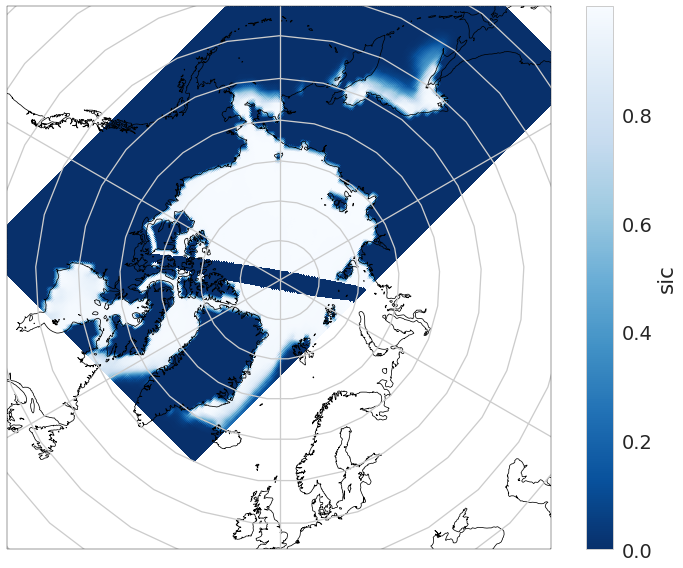

In [3]:
# Plot SIC on target projection
plt.figure(figsize=(10,8));
ax1 = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=0))
sic_bilinear.plot.pcolormesh(ax=ax1, x='lon', y='lat', 
                                     transform=ccrs.PlateCarree(), cmap='Blues_r')
ax1.coastlines(linewidth=0.75, color='black', resolution='50m')
ax1.gridlines(crs=ccrs.PlateCarree(), linestyle='-')
ax1.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())
plt.tight_layout()

# Conservative

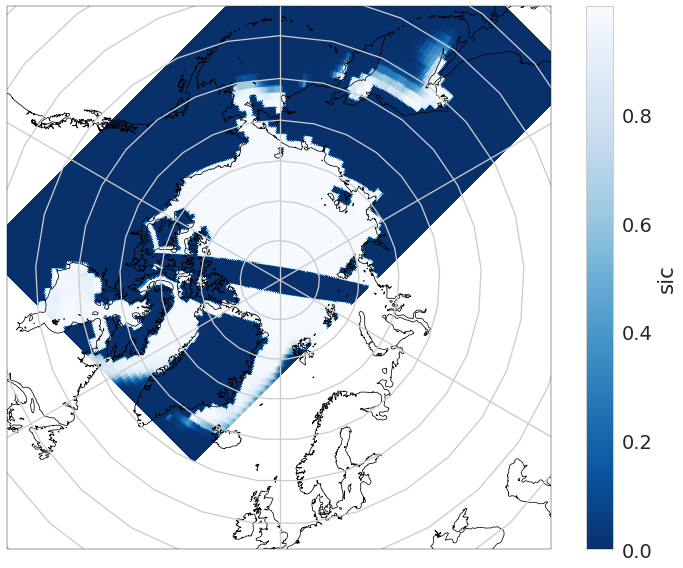

In [4]:
# Plot SIC on target projection
plt.figure(figsize=(10,8));
ax1 = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=0))
sic_conservative.plot.pcolormesh(ax=ax1, x='lon', y='lat', 
                                     transform=ccrs.PlateCarree(), cmap='Blues_r')
ax1.coastlines(linewidth=0.75, color='black', resolution='50m')
ax1.gridlines(crs=ccrs.PlateCarree(), linestyle='-')
ax1.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())
plt.tight_layout()

# Nearest source 2 destination

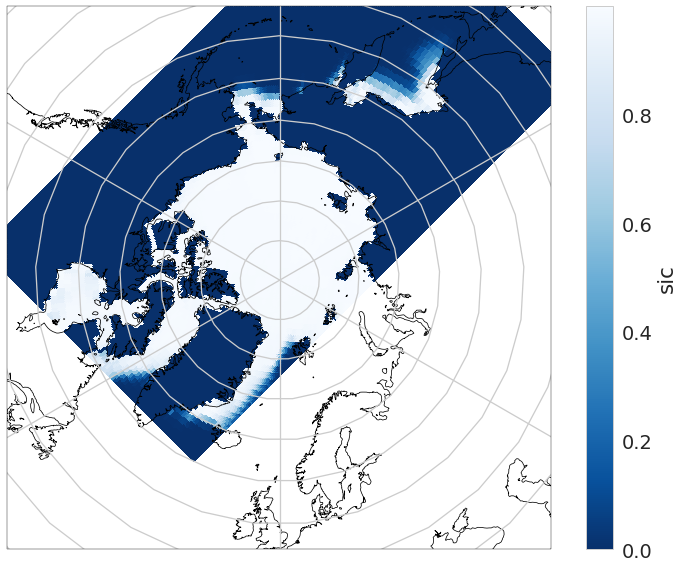

In [5]:
# Plot SIC on target projection
plt.figure(figsize=(10,8));
ax1 = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=0))
sic_nearest_s2d.plot.pcolormesh(ax=ax1, x='lon', y='lat', 
                                     transform=ccrs.PlateCarree(), cmap='Blues_r')
ax1.coastlines(linewidth=0.75, color='black', resolution='50m')
ax1.gridlines(crs=ccrs.PlateCarree(), linestyle='-')
ax1.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())
plt.tight_layout()